In [15]:
#Diane Stratton
#Hood College - CS 522 Fall 2018
#Project
#Notebook 1 - Farmers Market statistics

#import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

plt.style.use('ggplot')

In [16]:
#import farmers market data file, and verify contents
fm = pd.read_csv('farmers_mkts_modif.csv');
print(fm.shape)
fm.head()

(51, 2)


,state,fm_count
0,al,78
1,ak,24
2,az,65
3,ar,62
4,ca,454


In [17]:
#Generate farmers market count statistics
#Gives Min and Max numbers of farmers markets
fm['fm_count'].describe()

count     51.000000
mean     112.686275
std       94.969361
min       17.000000
25%       50.000000
50%       81.000000
75%      147.000000
max      472.000000
Name: fm_count, dtype: float64

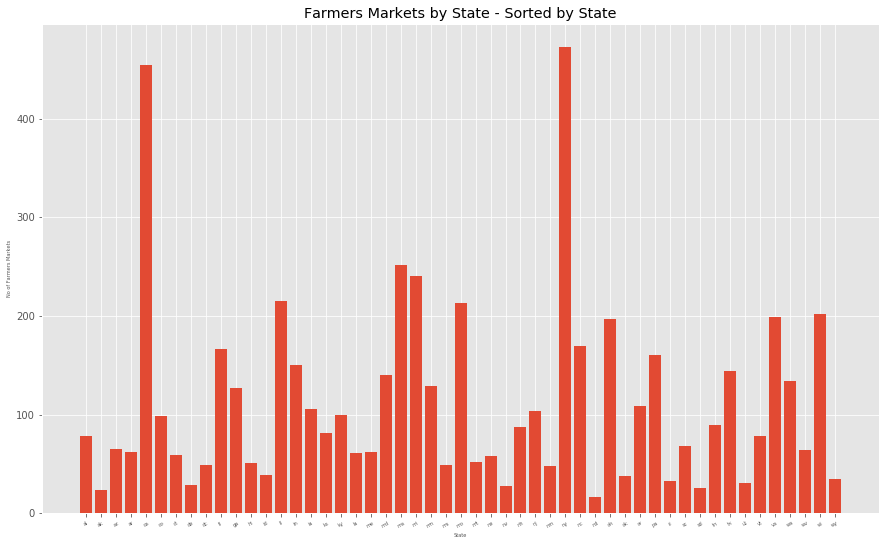

In [18]:
#Display bar graph of farmers market counts by state
states = fm['state'].values
counts = fm['fm_count'].values

plt.rcParams['figure.figsize'] = (15,9)

index = np.arange(len(states))
plt.bar(index, counts)
plt.xlabel('State', fontsize=5)
plt.ylabel('No of Farmers Markets', fontsize=5)
plt.xticks(index, states, fontsize=5, rotation=30)
plt.title('Farmers Markets by State - Sorted by State')
plt.show()

In [19]:
#Sort dataset by farmers market count
fm_sorted = fm.sort_values(by=['fm_count'])
fm_sorted.head()

,state,fm_count
34,nd,17
1,ak,24
41,sd,26
28,nv,28
7,de,29


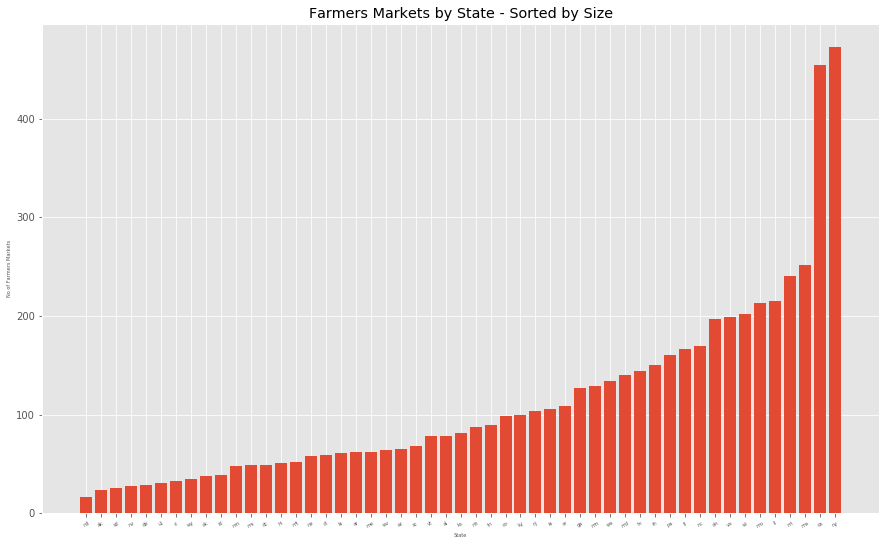

In [20]:
#Display bar chart of sorted dataset

x_label = fm_sorted['state'].values
y_label = fm_sorted['fm_count'].values

plt.rcParams['figure.figsize'] = (15,9)

index = np.arange(len(x_label))
plt.bar(index, y_label)
plt.xlabel('State', fontsize=5)
plt.ylabel('No of Farmers Markets', fontsize=5)
plt.xticks(index, x_label, fontsize=5, rotation=30)
plt.title('Farmers Markets by State - Sorted by Size')
plt.show()

In [21]:
#import data file with farmers markets and population data
fm_pop = pd.read_csv('fm_by_popul.csv');
print(fm_pop.shape)
fm_pop.head()

(51, 3)


,state,fm_count,fm_per_100k
0,al,78,1.604758
1,ak,24,3.236586
2,az,65,0.940851
3,ar,62,2.074806
4,ca,454,1.155320


In [22]:
#Sort dataset by # of FMs per 100K population
fm_pop_sorted = fm_pop.sort_values(by=['fm_per_100k'])
fm_pop_sorted.head()

,state,fm_count,fm_per_100k
43,tx,144,0.516039
9,fl,167,0.808459
2,az,65,0.940851
28,nv,28,0.952623
36,ok,38,0.969089


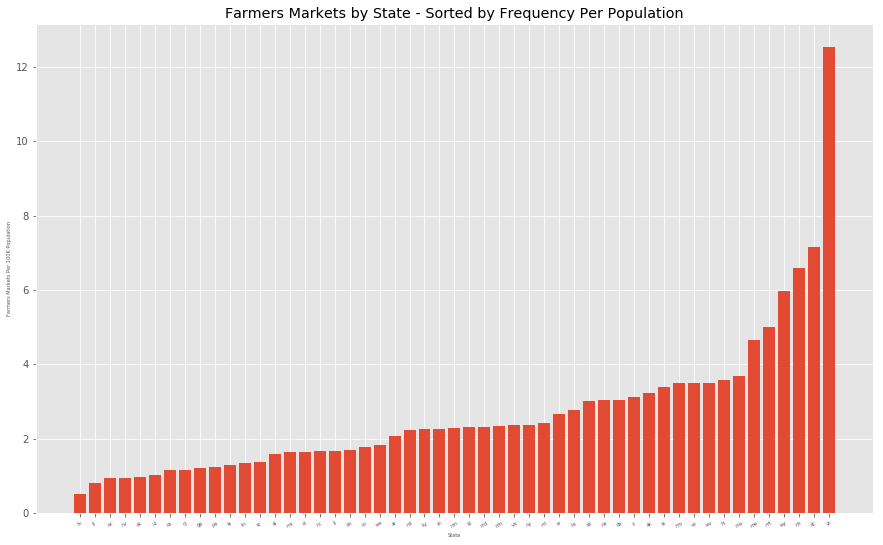

In [23]:
#Display bar chart of sorted dataset

x_label = fm_pop_sorted['state'].values
y_label = fm_pop_sorted['fm_per_100k'].values

plt.rcParams['figure.figsize'] = (15,9)

index = np.arange(len(x_label))
plt.bar(index, y_label)
plt.xlabel('State', fontsize=5)
plt.ylabel('Farmers Markets Per 100K Population', fontsize=5)
plt.xticks(index, x_label, fontsize=5, rotation=30)
plt.title('Farmers Markets by State - Sorted by Frequency Per Population')
plt.show()

In [24]:
#import data file with FMs by population, with full state names
#use this for map generation
df = pd.read_csv('fms_per_100k_statenames_2016.csv');

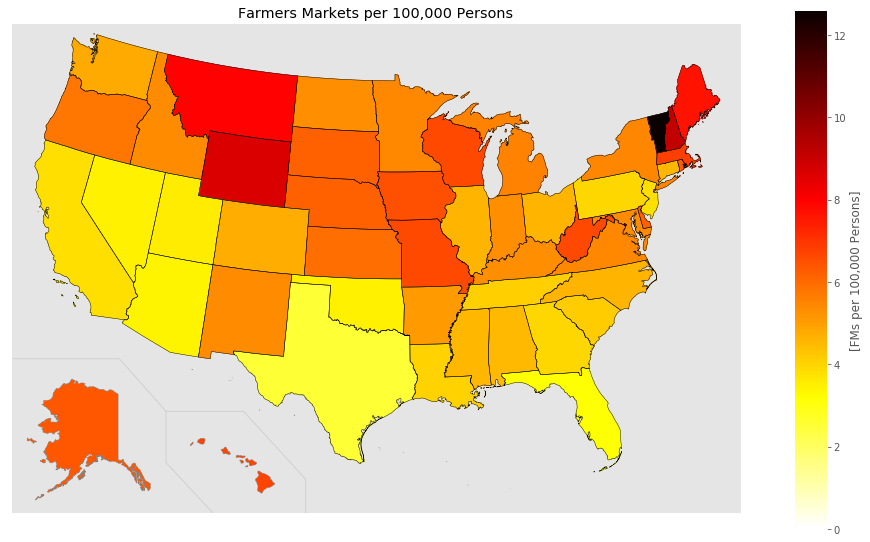

In [26]:
#Generate map of FMs by population

#Code is a modification of the code provided on the matplotlib GitHub account
#URL https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py

plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  --------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

 
#%% ---------   convert dataframe to dictionary  ----------------------------
mydict = df.set_index('state')['fm_per_100k'].to_dict()
    

#%% -------- choose a color for matching states -------
colors={}
statenames=[]
cmap = plt.cm.hot_r #use reversed 'hot' colormap
vmin = 0; vmax = 12.6 # set range based on fm_per_100k values
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    #exclude Puerto Rico (include District of Columbia)
    if statename not in ['Puerto Rico']:
        fmcount = mydict[statename]
        colors[statename] = cmap(np.sqrt((fmcount-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    

#%% ---------  cycle through state names, color each one  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
             
        
#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

plt.title('Farmers Markets per 100,000 Persons')


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)


#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[FMs per 100,000 Persons]')

plt.show()